# Exercício 9

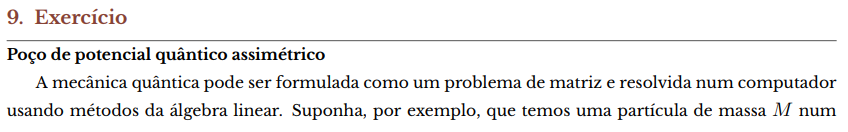
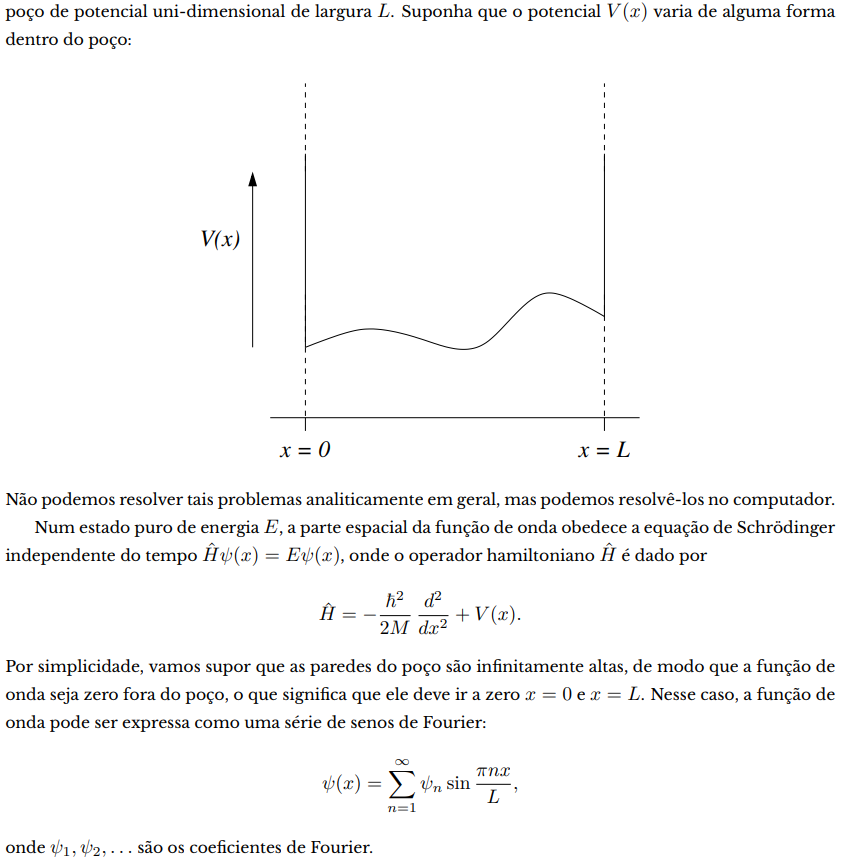
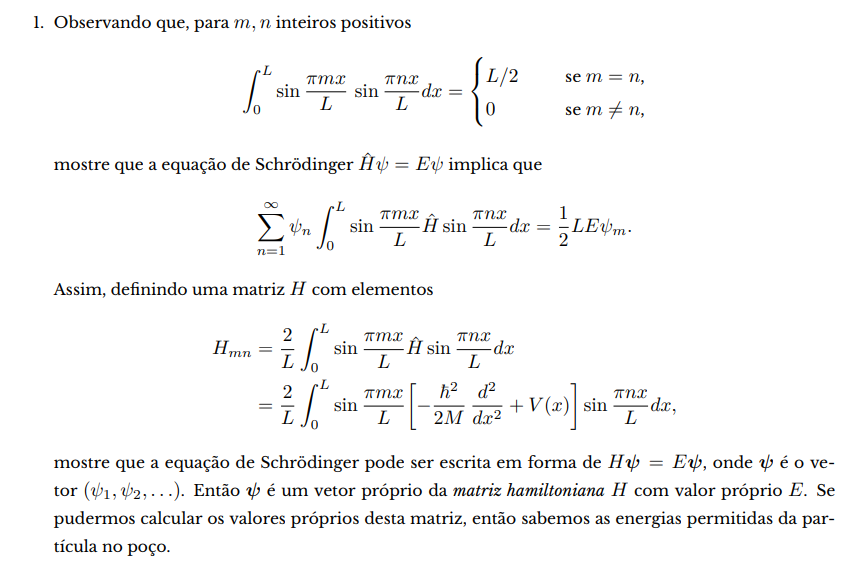
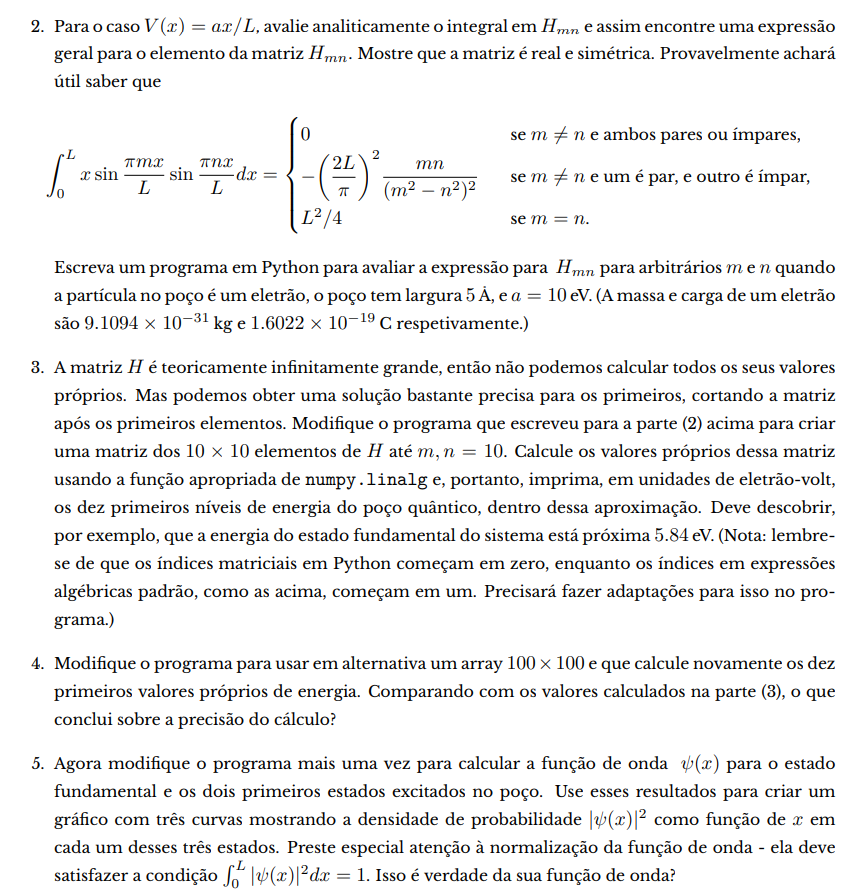

In [249]:
from typing import Callable
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Alínea 1

Temos que:

$$
\begin{align*}

\hat H\psi(x) = E\psi(x) &\hArr \sum_{n=1}^{+\infty} \psi_n \hat H \sin\left(\frac{\pi n x}{L}\right) = E\sum_{m=1}^{+\infty}\psi_m\sin\left(\frac{\pi m x}{L}\right)
\\\\

&\hArr \sum_{n=1}^{+\infty} \psi_n \sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right) = E\sum_{m=1}^{+\infty}\psi_m\sin^2\left(\frac{\pi m x}{L}\right)
\\\\

&\hArr \sum_{n=1}^{+\infty} \psi_n \int_0^L\sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right)\ dx = E\sum_{m=1}^{+\infty}\psi_m\int_0^L\sin^2\left(\frac{\pi m x}{L}\right)\ dx
\\\\

&\hArr \sum_{n=1}^{+\infty} \psi_n \int_0^L\sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right)\ dx = \frac12 LE \psi_m

\end{align*}
$$

Obtemos então a primeira expressão pedida. Podemos agora continuar escrevendo:


$$
\begin{align*}

&\ \sum_{n=1}^{+\infty} \psi_n \int_0^L\sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right)\ dx = \frac12 LE \psi_m
\\\\

\hArr&\ \sum_{n=1}^{+\infty} \psi_n \frac 2L\int_0^L\sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right)\ dx = E \psi_m
\\\\

\hArr&\ \sum_{n=1}^{+\infty}H_{mn}\psi_n = E\psi_m

\end{align*}
$$

Obtemos então uma equação de valores próprios!

## Alínea 2

Temos que:


$$
\begin{align*}

H_{mn} &= \frac 2L\int_0^L\sin\left(\frac{\pi m x}{L}\right)\hat H \sin\left(\frac{\pi n x}{L}\right)\ dx
\\\\

&= \frac 2L\int_0^L\sin\left(\frac{\pi m x}{L}\right)\left[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} + \frac{ax}{L}\right]\sin\left(\frac{\pi n x}{L}\right)\ dx
\\\\

&= \frac{2a}{L^2}\int_0^Lx\sin\left(\frac{\pi m x}{L}\right)\sin\left(\frac{\pi n x}{L}\right) + \frac{\hbar^2}{ML}\left(\frac{\pi n}{L}\right)^2\int_0^L\sin\left(\frac{\pi m x}{L}\right)\sin\left(\frac{\pi n x}{L}\right)\ dx
\\\\

&= 
\begin{cases}

\frac{2a}{L^2}\frac{L^2}{4} +  \frac{\hbar^2}{ML}\left(\frac{\pi n}{L}\right)^2\frac{L}{2}& \text{se } m = n
\\\\

0 + 0 & \text{se } m \ne n \text{ e ambos pares ou ímpares}
\\\\

-\frac{2a}{L^2}\frac{4L^2}{\pi^2}\frac{mn}{(m^2-n^2)^2}& \text{se } m \ne n \text{ e um é par e outro ímpar}

\end{cases}
\\\\

&= 
\begin{cases}

\frac{a}{2} + \frac{\hbar^2}{2M}\left(\frac{\pi n}{L}\right)^2& \text{se } m = n
\\\\

0 & \text{se } m \ne n \text{ e ambos pares ou ímpares}
\\\\

-\frac{8a}{\pi^2}\frac{mn}{(m^2-n^2)^2}& \text{se } m \ne n \text{ e um é par e outro ímpar}

\end{cases}

\end{align*}
$$

Notamos imediatamente que a matriz é real. Podemos verificar que é simétrica pois:

$$
H_{mn} = H_{nm}
$$

Já que:
- Para $m = n$ a igualdade é trivial.
- Para $m \ne n$ e ambos pares ou ímpares ambos os lados da equação são $0$.
- Para $m \ne n$ e um é par e outro ímpar a expressão de $H_{mn}$ é igual à de $H_{nm}$.

In [250]:
# Constantes (em SI)
L = 5e-10
M = 9.1094e-31
Q = 1.6022e-19

h = 6.626068e-34
a = 10 * Q

hbar = h / (2 * np.pi)


def matrizH(n: int, m: int) -> float:
    """
        Devolve o elemento `H_{mn}` da matriz hamiltoniana.
    """
    global L, M, Q, h, a, hbar

    # Converter índices do Python em índices algébricos
    n += 1
    m += 1

    if n == m:
        return (a/2) + ((hbar * np.pi * n) ** 2) / (2 * M * L**2)
    
    elif (n % 2) == (m % 2):
        return 0
    
    else:
        return -(8 * a / (np.pi**2)) * ((m * n) / (m**2 - n**2)**2)

## Alínea 3

In [251]:
def eigenfinderH(N: int) -> tuple[np.ndarray, np.ndarray]:
    """
        Calcula os autovalores e autovetores para a matriz H calculada por `matrizH`.
    """

    H = np.zeros((N, N))

    # Calcular a parte acima da diagonal principal
    for m in range(N):
        for n in range(m+1, N):
            H[m, n] = matrizH(n, m)

    # Calcular a parte abaixo da diagonal principal usando o facto de a matriz ser simétrica
    H += H.T

    # Calcular os elementos da diagonal principal
    for n in range(N):
        H[n, n] = matrizH(n, n)


    # Calcular os autovalores e autovetores de uma matriz hermítica (como H é real hermítica = simétrica)
    ww, vv = np.linalg.eigh(H)


    return ww, vv

ww, vv = eigenfinderH(10)
for n, e in enumerate(ww/Q):
    print(f"Energia do nível {n+1}: {e:.4f} eV")

Energia do nível 1: 5.8363 eV
Energia do nível 2: 11.1810 eV
Energia do nível 3: 18.6627 eV
Energia do nível 4: 29.1438 eV
Energia do nível 5: 42.6544 eV
Energia do nível 6: 59.1843 eV
Energia do nível 7: 78.7281 eV
Energia do nível 8: 101.2838 eV
Energia do nível 9: 126.8493 eV
Energia do nível 10: 155.5528 eV


## Alínea 4

In [252]:
# Parâmetros
E = 10

ww, vv = eigenfinderH(100)
for n, e in enumerate(ww/Q):
    print(f"Energia do nível {n+1}: {e:.4f} eV")
    if n+1 >= E:
        break

Energia do nível 1: 5.8363 eV
Energia do nível 2: 11.1810 eV
Energia do nível 3: 18.6627 eV
Energia do nível 4: 29.1438 eV
Energia do nível 5: 42.6544 eV
Energia do nível 6: 59.1843 eV
Energia do nível 7: 78.7281 eV
Energia do nível 8: 101.2832 eV
Energia do nível 9: 126.8485 eV
Energia do nível 10: 155.4231 eV


Podemos perceber que a precisão do cálculo aumenta muito pouco, sendo apenas significativamente diferente para níveis de energia superiores.

## Alínea 5

Vamos agora usar os autovetores obtidos ao resolver a equação de valores próprios para determinar a função de onda:

$$
\psi(x) = \sum_{n=1}^{+\infty}\psi_n \sin\left(\frac{\pi n x}{L}\right)
$$

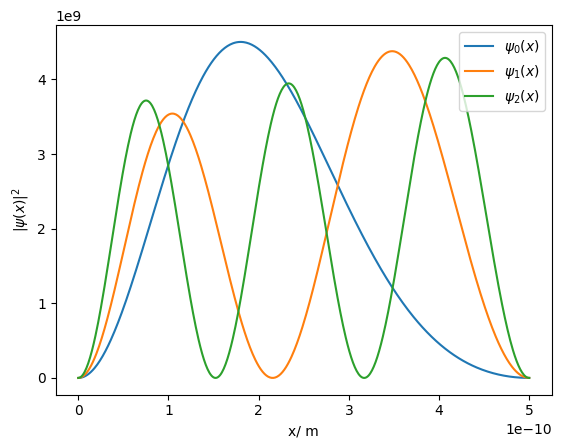

In [253]:
def quadgausseasy(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar zeros e pesos
    xx, ww = np.polynomial.legendre.leggauss(n)

    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)


def psi(N: int, nivel: int) -> Callable:
    """
        Devolve uma função psi(x) que corresponde à função de onda no nível `nivel` do potencial em questão, usando a matriz hamiltoniana N por N.
    """
    global L

    # Calcular autovalores e autovetores
    ww, vv = eigenfinderH(N)

    # Selecionar os autovetores de interesse
    coef = vv[:, nivel]

    # Função de onda não normalizada
    psioriginal = lambda x: np.sum([coef[n] * np.sin(np.pi * n * x / L) for n in range(1, N)], axis=0)

    # Normalizar a função de onda
    psisquared = lambda x: np.abs(psioriginal(x))**2
    integral = quadgausseasy(0, L, psisquared, 50)

    return lambda x: psioriginal(x) / integral**0.5


def grafsquare(start: float, end: float, func: Callable, n: int=500, label: str="") -> None:
    """
        Faz a representação gráfica de |`func(x)`|^2 para `x` em `[start, end]` avaliando func em `n` pontos.
    """

    xx = np.linspace(start, end, n)
    yy = func(xx)
    yy = np.abs(yy)**2

    plt.plot(xx, yy, label=label)


# Completar: Perceber de onde vem o nivel + 1 em vez de nível
for nivel in range(3):
    psi_n = psi(100, nivel+1)
    grafsquare(0, L, psi_n, label=f"$\\psi_{nivel}(x)$")

plt.xlabel("x/ m")
plt.ylabel("$|\\psi(x)|^2$")
plt.legend()
plt.show()